In [1]:
import mne
import h5py
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import os
from tools import * # stuff from this project
from ridge import * # ridge pkg
from utils import * # utils from ridge

/Users/maansidesai/anaconda3/envs/mne/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/maansidesai/anaconda3/envs/mne/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## Load data

In [2]:
user = 'maansi'
if user == 'maansi':
    data_dir = '/Users/maansidesai/Box/hamilton_lab_data/trailers_timit' #change this path
elif user == 'garret':
    data_dir = '/home/kfsh/data/trailers_timit'

subject='MT0002'
stimulus_class = 'TIMIT'

#load stim and resp 
resp_dict, stim_dict = loadEEGh5(subject, stimulus_class, data_dir,
          eeg_epochs=True, resp_mean = True, binarymat=False, binaryfeatmat = True, envelope=False, pitch=False, gabor_pc10=False, 
          spectrogram=False, binned_pitches=False, spectrogram_scaled=False, scene_cut=False)

TIMIT
['fadg0_si1279.wav', 'faem0_si2022.wav', 'falr0_si1955.wav', 'fbcg1_si1612.wav', 'fbjl0_si2182.wav', 'fbmh0_si1766.wav', 'fbmj0_si815.wav', 'fcag0_si1503.wav', 'fcag0_si1641.wav', 'fcaj0_si1479.wav', 'fcaj0_si1804.wav', 'fceg0_si1878.wav', 'fceg0_si618.wav', 'fcft0_si1808.wav', 'fcft0_si548.wav', 'fcjs0_si1607.wav', 'fcmh0_si2084.wav', 'fcmh1_si1493.wav', 'fcmr0_si1735.wav', 'fcmr0_si475.wav', 'fcrh0_si1718.wav', 'fcrz0_si2053.wav', 'fdas1_si2091.wav', 'fdaw0_si1406.wav', 'fdfb0_si1948.wav', 'fdhc0_si2189.wav', 'fdjh0_si1565.wav', 'fdml0_si2075.wav', 'fdms0_si1218.wav', 'fdrd1_si1544.wav', 'fdrw0_si1423.wav', 'fdxw0_si1511.wav', 'fdxw0_si2141.wav', 'feac0_si1245.wav', 'fear0_si1882.wav', 'fedw0_si1653.wav', 'fetb0_si1148.wav', 'fgcs0_si856.wav', 'fgjd0_si1179.wav', 'fgmd0_si2107.wav', 'fgrw0_si1990.wav', 'fhlm0_si1560.wav', 'fisb0_si2209.wav', 'fjas0_si2030.wav', 'fjhk0_si1652.wav', 'fjkl0_si1562.wav', 'fjkl0_si2192.wav', 'fjlg0_si1506.wav', 'fjlg0_si2306.wav', 'fjlr0_si1861.wav'

phnfeatmat shape is:
(14, 232)
taking the mean across repeats
(64, 232)
fceg0_si1878.wav
phnfeatmat shape is:
(14, 165)
taking the mean across repeats
(64, 165)
fceg0_si618.wav
phnfeatmat shape is:
(14, 315)
taking the mean across repeats
(64, 315)
fcft0_si1808.wav
phnfeatmat shape is:
(14, 324)
taking the mean across repeats
(64, 324)
fcft0_si548.wav
phnfeatmat shape is:
(14, 243)
taking the mean across repeats
(64, 243)
fcjs0_si1607.wav
phnfeatmat shape is:
(14, 227)
taking the mean across repeats
(64, 227)
fcmh0_si2084.wav
phnfeatmat shape is:
(14, 196)
taking the mean across repeats
(64, 196)
fcmh1_si1493.wav
phnfeatmat shape is:
(14, 324)
taking the mean across repeats
(64, 324)
fcmr0_si1735.wav
phnfeatmat shape is:
(14, 298)
taking the mean across repeats
(64, 298)
fcmr0_si475.wav
phnfeatmat shape is:
(14, 249)
taking the mean across repeats
(64, 249)
fcrh0_si1718.wav
phnfeatmat shape is:
(14, 218)
taking the mean across repeats
(64, 218)
fcrz0_si2053.wav
phnfeatmat shape is:
(14

(64, 250)
mabw0_si2294.wav
phnfeatmat shape is:
(14, 301)
taking the mean across repeats
(64, 301)
madd0_si1295.wav
phnfeatmat shape is:
(14, 238)
taking the mean across repeats
(64, 238)
maeb0_si2250.wav
phnfeatmat shape is:
(14, 327)
taking the mean across repeats
(64, 327)
maeo0_si1956.wav
phnfeatmat shape is:
(14, 315)
taking the mean across repeats
(64, 315)
mafm0_si2199.wav
phnfeatmat shape is:
(14, 143)
taking the mean across repeats
(64, 143)
majc0_si2095.wav
phnfeatmat shape is:
(14, 318)
taking the mean across repeats
(64, 318)
makr0_si1352.wav
phnfeatmat shape is:
(14, 278)
taking the mean across repeats
(64, 278)
makr0_si722.wav
phnfeatmat shape is:
(14, 264)
taking the mean across repeats
(64, 264)
marc0_si1188.wav
phnfeatmat shape is:
(14, 184)
taking the mean across repeats
(64, 184)
marc0_si1818.wav
phnfeatmat shape is:
(14, 281)
taking the mean across repeats
(64, 281)
marw0_si646.wav
phnfeatmat shape is:
(14, 310)
taking the mean across repeats
(64, 310)
mbbr0_si1685.

phnfeatmat shape is:
(14, 302)
taking the mean across repeats
(64, 302)
mjdc0_si1161.wav
phnfeatmat shape is:
(14, 295)
taking the mean across repeats
(64, 295)
mjdc0_si2165.wav
phnfeatmat shape is:
(14, 237)
taking the mean across repeats
(64, 237)
mjdg0_si1705.wav
phnfeatmat shape is:
(14, 288)
taking the mean across repeats
(64, 288)
mjdh0_si1984.wav
phnfeatmat shape is:
(14, 172)
taking the mean across repeats
(64, 172)
mjdm0_si1937.wav
phnfeatmat shape is:
(14, 171)
taking the mean across repeats
(64, 171)
mjdm0_si974.wav
phnfeatmat shape is:
(14, 187)
taking the mean across repeats
(64, 187)
mjeb0_si656.wav
phnfeatmat shape is:
(14, 309)
taking the mean across repeats
(64, 309)
mjfc0_si1033.wav
phnfeatmat shape is:
(14, 237)
taking the mean across repeats
(64, 237)
mjfc0_si1663.wav
phnfeatmat shape is:
(14, 307)
taking the mean across repeats
(64, 307)
mjfr0_si2235.wav
phnfeatmat shape is:
(14, 329)
taking the mean across repeats
(64, 329)
mjhi0_si555.wav
phnfeatmat shape is:
(14

phnfeatmat shape is:
(14, 244)
taking the mean across repeats
(64, 244)
mrjm4_si2119.wav
phnfeatmat shape is:
(14, 286)
taking the mean across repeats
(64, 286)
mrjo0_si1624.wav
phnfeatmat shape is:
(14, 209)
taking the mean across repeats
(64, 209)
mrjs0_si1523.wav
phnfeatmat shape is:
(14, 146)
taking the mean across repeats
(64, 146)
mrjt0_si1805.wav
phnfeatmat shape is:
(14, 211)
taking the mean across repeats
(64, 211)
mrld0_si2224.wav
phnfeatmat shape is:
(14, 287)
taking the mean across repeats
(64, 287)
mrlj0_si2050.wav
phnfeatmat shape is:
(14, 245)
taking the mean across repeats
(64, 245)
mrms0_si2100.wav
phnfeatmat shape is:
(14, 300)
taking the mean across repeats
(64, 300)
mrpc1_si2026.wav
phnfeatmat shape is:
(14, 220)
taking the mean across repeats
(64, 220)
mrpp0_si1814.wav
phnfeatmat shape is:
(14, 252)
taking the mean across repeats
(64, 252)
mrrk0_si1716.wav
phnfeatmat shape is:
(14, 208)
taking the mean across repeats
(64, 208)
mrtj0_si2032.wav
phnfeatmat shape is:


In [3]:
#load weights from encoding model - from training set (370 sentences)
f = h5py.File('%s/%s_STRF_by_phnfeat_%s.hf5' %(data_dir, subject, stimulus_class))
weights = f['wts_%s' %(stimulus_class.lower())][:]
reshaped_wts = weights.reshape(-1,14,weights.shape[1])

# Load pvals for training set
p_vals = f['pvals_%s' %(stimulus_class.lower())][:]
sig_weights = weights[:,np.where(p_vals[0] < 0.05)[0]]

In [19]:
# Make delays
delay_min, delay_max = 0.,0.6
wt_pad = 0.
fs = 128.
delays = np.arange(
    np.floor((delay_min-wt_pad)*fs),np.ceil((delay_max+wt_pad)*fs),dtype=np.int)

#create list of features
feat_labels = ['sonorant','obstruent','voiced','back','front','low','high','dorsal',
               'coronal','labial','syllabic','plosive','fricative','nasal']
nfeats = len(feat_labels)


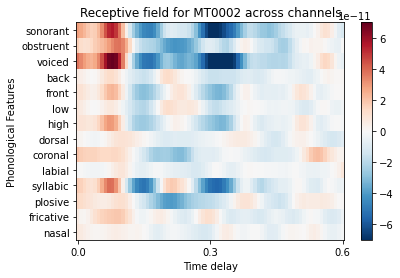

In [20]:
receptive_field = sig_weights.reshape(np.int(sig_weights.shape[0]/nfeats),nfeats,sig_weights.shape[1] )
smax = receptive_field[0].max() 
t = np.linspace(delay_min, delay_max, len(delays))

#plot receptive field for significant channels
plt.imshow(receptive_field.mean(axis=(2)).T, cmap=cm.RdBu_r, aspect='auto', vmin=-smax, vmax=smax)
plt.gca().set_xticks([0, (len(delays)-1)/2, len(delays)-1])
plt.gca().set_xticklabels([t[0], t[np.int((len(delays)-1)/2)], t[len(delays)-1]])
plt.gca().set_yticks(np.arange(nfeats))
plt.gca().set_yticklabels(feat_labels)
plt.xlabel('Time delay')
plt.ylabel('Phonological Features')
plt.title('Receptive field for %s across channels' %(subject))
plt.colorbar()
plt.savefig(f'./figs/{subject}_receptive_field.pdf')


## Predict the response
Given the `weights` from our training set of 370 sentences, we are going to predict the response to the test stimulus `vStim` (10 held out sentences). We will then compare this to the actual response (`vResp`) and calculate the correlation coefficient.

In [6]:
test_set = ['fcaj0_si1479.wav', 'fcaj0_si1804.wav', 'fdfb0_si1948.wav', 
    'fdxw0_si2141.wav', 'fisb0_si2209.wav', 'mbbr0_si2315.wav', 
    'mdlc2_si2244.wav', 'mdls0_si998.wav', 'mjdh0_si1984.wav', 
    'mjmm0_si625.wav']

## Classification

Get some sort of correlation for each of the 10 sentences in our test set, meaning we get a correlation between the predicted response to each of these ten sentences and the actual response for each of those ten sentences, giving us a 10x10 confusion matrix.

Next, pick the sentence with the highest correlation. That's your classification

In [7]:
# Split vResp, vStim by sn
vResp_by_sn, vStim_by_sn = dict(),dict()
for sn in test_set:
    vResp_by_sn[sn] = resp_dict[sn][0].T
    vStim_temp = stim_dict[sn][0].T
    vStim_by_sn[sn] = make_delayed(vStim_temp, delays)
# Truncate each sentence so they are all the same length (the length of the shortest sn)
# This is to give each sentence an "equal chance" in classification
min_len = np.min([vResp_by_sn[sn].shape[0] for sn in vResp_by_sn.keys()])
for key in vResp_by_sn.keys():
    vResp_by_sn[key] = vResp_by_sn[key][:min_len,:]
    vStim_by_sn[key] = vStim_by_sn[key][:min_len,:]

# Plotting

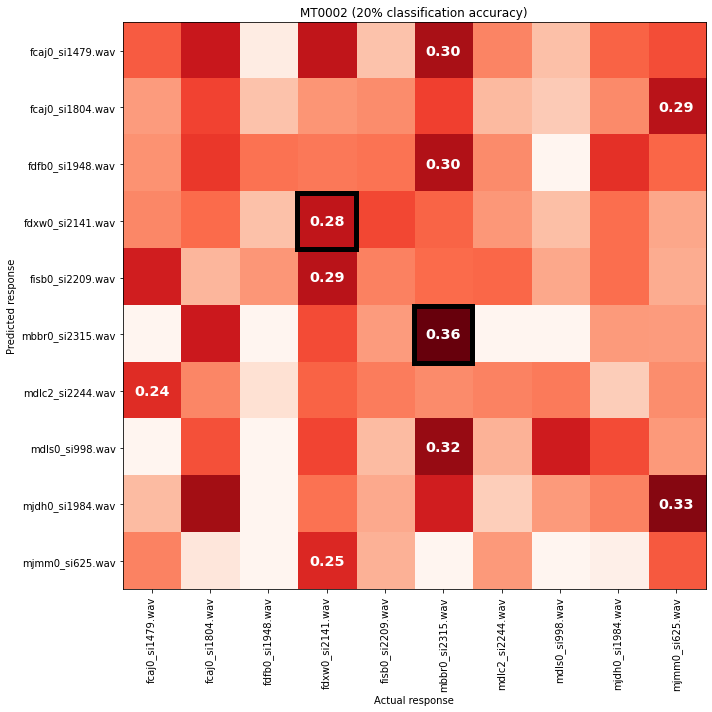

In [8]:
# All weights
# Make 10x10 correlation matrix
correlations = np.zeros((len(test_set),len(test_set)))
for i,key1 in enumerate(test_set):
    for ii,key2 in enumerate(test_set):
        comparison = f'{key1}-{key2}'
        correlations[i,ii] = predict_response(
            weights, vStim_by_sn[key1], vResp_by_sn[key2])[0].mean()
# Plot all corrs
correct_classifications = 0
fig = plt.figure(figsize=(10,10))
plt.imshow(correlations,vmin=0,vmax=correlations.max(),aspect='auto',cmap=cm.Reds);
plt.xlabel("Actual response");
plt.ylabel("Predicted response");
plt.gca().set_xticks(np.arange(correlations.shape[0]));
plt.gca().set_yticks(np.arange(correlations.shape[0]));
plt.gca().set_xticklabels(test_set,rotation=90);
plt.gca().set_yticklabels(test_set);
# plt.colorbar();
for i,row in enumerate(correlations): # get the max
    for ii,item in enumerate(row):
        if item == row.max():
            plt.text(ii,i,"%.2f"%correlations[i,ii],va="center",ha="center",color="white",fontsize="x-large",weight="bold")
            if i == ii:
                rect = plt.Rectangle((i-.5, ii-.5), 1,1, fill=False, color='k',lw=5)
                plt.gca().add_patch(rect)
                correct_classifications += 1
plt.title(f'{subject} ({int((correct_classifications/len(test_set))*100)}% classification accuracy)')
plt.tight_layout();

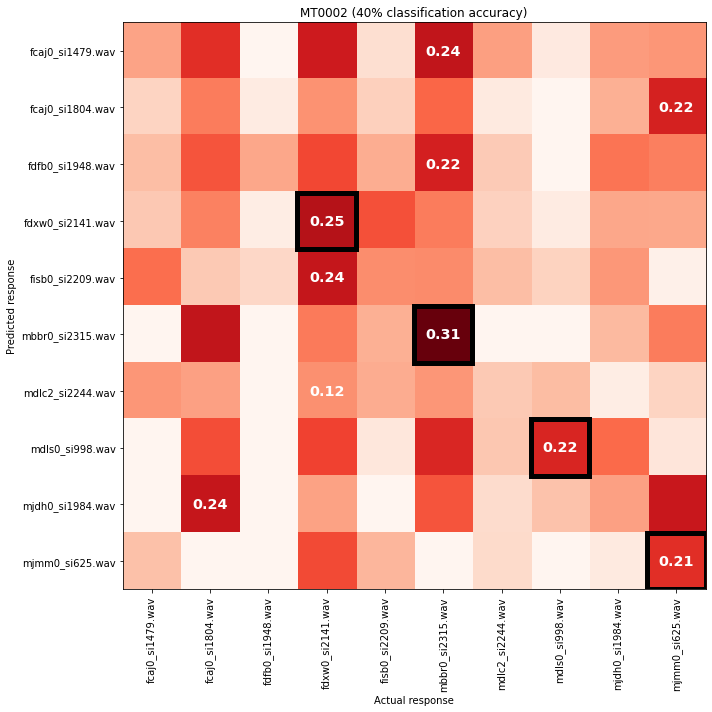

In [9]:
# Only significant weights (determined by bootstrap on training set)
correlations = np.zeros((len(test_set),len(test_set)))
for i,key1 in enumerate(test_set):
    for ii,key2 in enumerate(test_set):
        comparison = f'{key1}-{key2}'
        correlations[i,ii] = predict_response(
            sig_weights, vStim_by_sn[key1], vResp_by_sn[key2])[0].mean()
# Plot all corrs
correct_classifications = 0
fig = plt.figure(figsize=(10,10))
plt.imshow(correlations,vmin=0,vmax=correlations.max(),aspect='auto',cmap=cm.Reds);
plt.xlabel("Actual response");
plt.ylabel("Predicted response");
plt.gca().set_xticks(np.arange(correlations.shape[0]));
plt.gca().set_yticks(np.arange(correlations.shape[0]));
plt.gca().set_xticklabels(test_set,rotation=90);
plt.gca().set_yticklabels(test_set);
# plt.colorbar();
for i,row in enumerate(correlations): # get the max
    for ii,item in enumerate(row):
        if item == row.max():
            plt.text(ii,i,"%.2f"%correlations[i,ii],va="center",ha="center",color="white",fontsize="x-large",weight="bold")
            if i == ii:
                rect = plt.Rectangle((i-.5, ii-.5), 1,1, fill=False, color='k',lw=5)
                plt.gca().add_patch(rect)
                correct_classifications += 1
plt.title(f'{subject} ({int((correct_classifications/len(test_set))*100)}% classification accuracy)')
plt.tight_layout();

Text(0.5, 1.0, 'MT0002 classification')

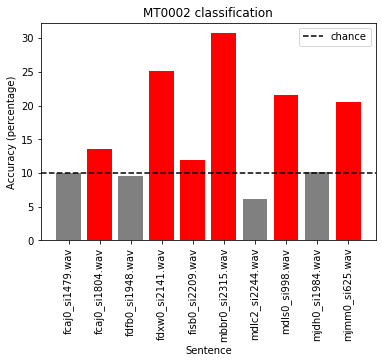

In [37]:
plt.figure()
clrs = ['red' if (x > 0.11) else 'grey' for x in np.diag(correlations) ]
plt.bar(np.arange(correlations.shape[0]), np.diag(correlations)*100, color=clrs)
plt.axhline(1/correlations.shape[0]*100, label='chance', color='k', linestyle='--')
plt.xlabel('Sentence')
plt.ylabel('Accuracy (percentage)')
plt.gca().set_xticks(np.arange(correlations.shape[0]))
plt.gca().set_xticklabels(test_set,rotation=90);
plt.legend()
plt.title('%s classification' %(subject))

## random shit

64it [00:30,  2.09it/s]


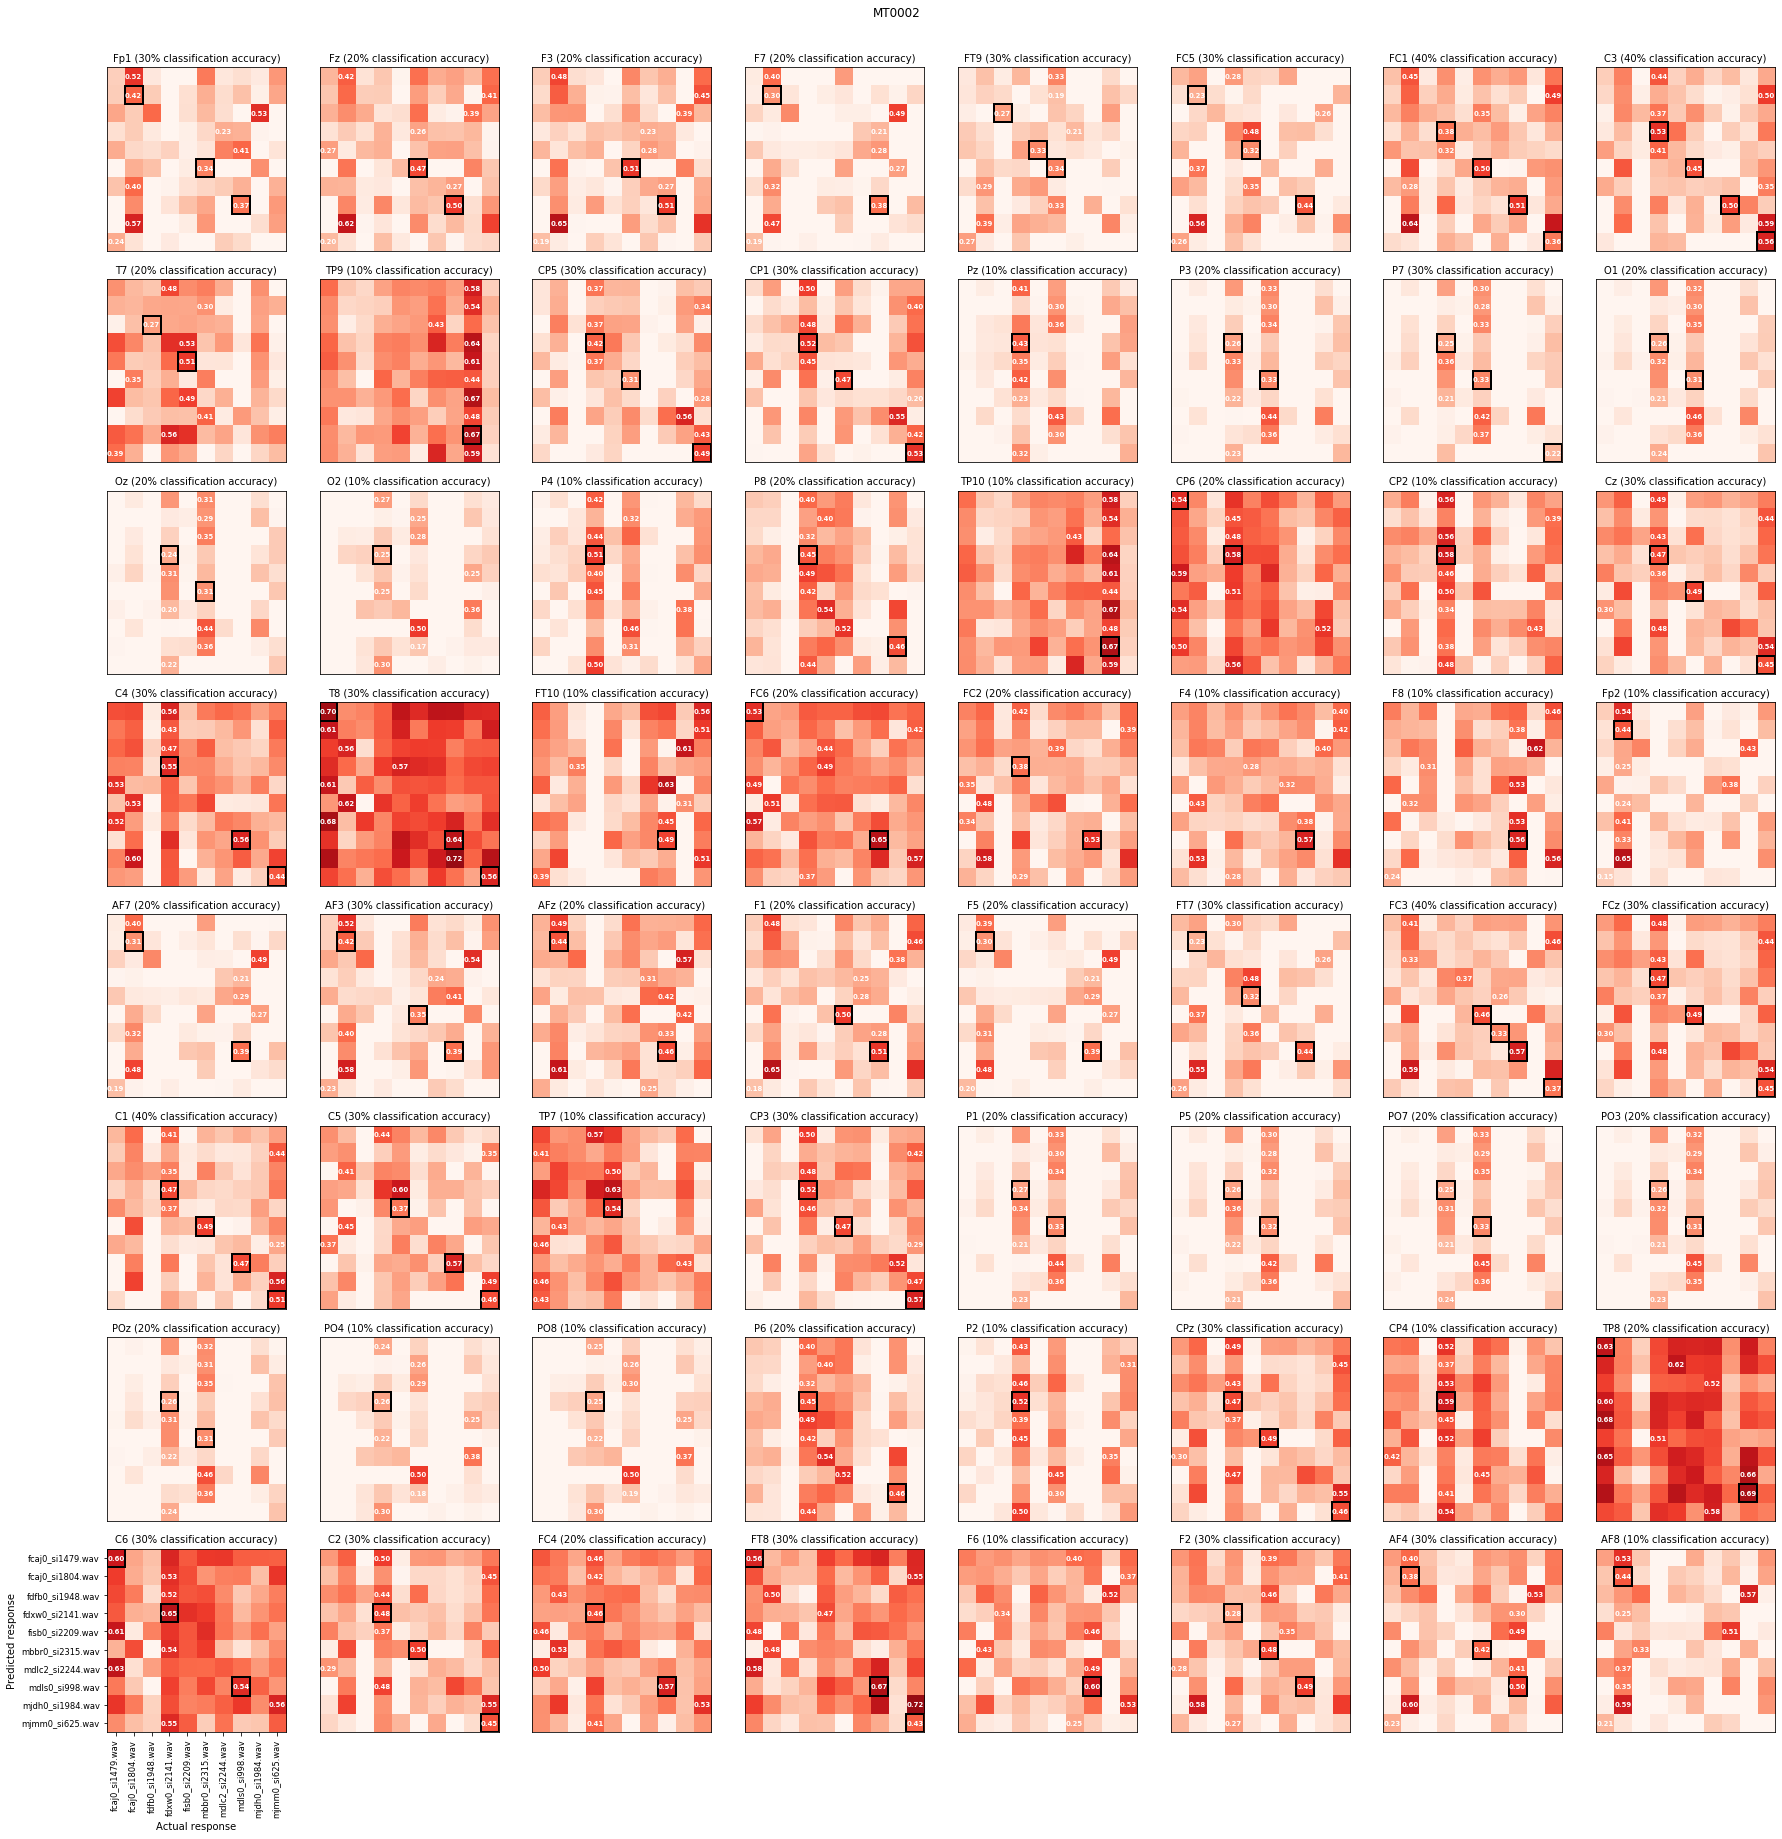

In [64]:
# Individual electrode subplots

# TO DO FOR GARRET: Put this on a topomap (copy STRF plotting code from thesis)

from tqdm import tqdm
corrs_by_ch = dict()

ch_names = ['Fp1','Fz','F3','F7','FT9','FC5','FC1','C3','T7','TP9','CP5','CP1','Pz','P3',
            'P7','O1','Oz','O2','P4','P8','TP10','CP6','CP2','Cz','C4','T8','FT10','FC6',
            'FC2','F4','F8','Fp2','AF7','AF3','AFz','F1','F5','FT7','FC3','FCz','C1','C5',
            'TP7','CP3','P1','P5','PO7','PO3','POz','PO4','PO8','P6','P2','CPz','CP4',
            'TP8','C6','C2','FC4','FT8','F6','F2','AF4','AF8']

fig,ax = plt.subplots(nrows=8,ncols=8,figsize=(25,25))
for idx,ch in tqdm(enumerate(ch_names)):
    correct_classifications = 0
    corrs_by_ch[ch] = np.zeros((len(test_set),len(test_set)))
    for i,key1 in enumerate(test_set):
        for ii,key2 in enumerate(test_set):
            comparison = f'{key1}-{key2}'
            corrs_by_ch[ch][i,ii] = predict_response(
                weights, vStim_by_sn[key1], vResp_by_sn[key2])[0][idx]
    plt.subplot(8,8,idx+1)
    plt.imshow(corrs_by_ch[ch],vmin=0,vmax=.8,aspect='auto',cmap=cm.Reds);
    if idx == 56:
        plt.xlabel("Actual response");
        plt.ylabel("Predicted response");
        plt.gca().set_xticks(np.arange(correlations.shape[0]));
        plt.gca().set_yticks(np.arange(correlations.shape[0]));
        plt.gca().set_xticklabels(test_set,rotation=90,fontsize='small');
        plt.gca().set_yticklabels(test_set,fontsize='small');
    else:
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
    for i,row in enumerate(corrs_by_ch[ch]): # get the max
        for ii,item in enumerate(row):
            if item == row.max():
                plt.text(ii,i,"%.2f"%corrs_by_ch[ch][i,ii],va="center",ha="center",color="white",fontsize='x-small',weight="bold")
                if i == ii:
                    rect = plt.Rectangle((i-.5, ii-.5), 1,1, fill=False, color='k',lw=2)
                    plt.gca().add_patch(rect)
                    correct_classifications += 1
    plt.title(f'{ch} ({int((correct_classifications/len(test_set))*100)}% classification accuracy)',fontsize='medium');
plt.suptitle(subject,x=.5,y=1.02);
plt.tight_layout();
fig.savefig(f'./figs/{subject}_all_chs.pdf')

## Post-office hours ideas
* Instead of averaging across all electrodes, only avg across elecs that had significant corr values in the TRAIN set (this should be in Maansi's h5 files)
* Instead of averaging across all electrodes, make an 8x8 subplot showing correlations at individual elecs. (Make sure they all have the same vmax)
* Somehow indicate which sentence is decoded in the `plt.imshow()` plot (Basically mark the max in each column).
* Repeat this process across all subjects, giving us within-subject classification metrics